# Overview of matplotlib

In [2]:
# initialization
import numpy as np

## Importing the matplotlib module

So far we have talked about how to manipulate data using python. But often times it is equally important to visualize the data. The main python module we'll use for such purpose is **matplotlib**. Like numpy, matplotlib is a third-party module that extends the functionality of python.

Unlike numpy, it is customary to import the `pyplot` submodule of matplotlib rather than importing matplotlib itself. To do so, we run:

In [3]:
import matplotlib.pyplot as plt

As in the case of numpy, the `as plt` part of the above line is optional, and serve to provides a shortcut to `matplotlib.pyplot`. And just as `np` is standard shorthand for `numpy`, `plt` is also a standard shorthand for `matplotlib.pyplot`

## Introductory examples

The fundamental unit of matplotlib graphics is a **figure**, which is composed of **axes**. To create a figure with a single pair of (as yet empty) axes and display it, we do:

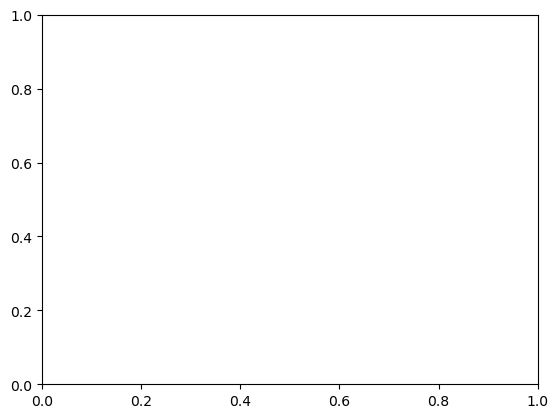

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
plt.show(fig)

Now let's add a data series to the figure. The simplest way to display a data series is to create a line plot, which can be done using the `.plot()` method on the axes object. We start by generating some simple data (namely, a straight line)

In [4]:
x = np.linspace(0, 1, 51)
y = 0.5 * x

We now plot the data series on the figure:

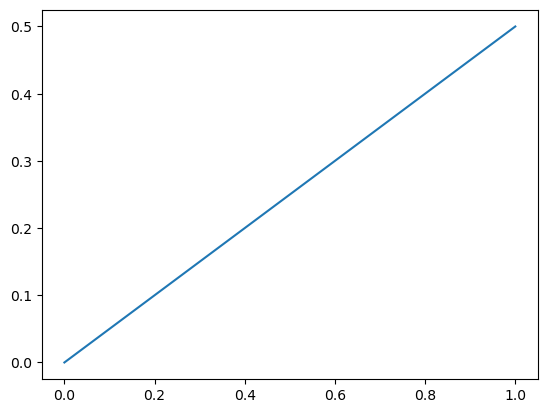

In [5]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y)

plt.show(fig)

Note that the plot is **not** generated by a _single_ function call, but by a **block** of code that **consists of multiple lines**. In general, you will start a (single panel) plot with `fig = plt.figure()` and `ax = fig.add_subplot()`, and end a plot with `plt.show(fig)`. The lines that sandwich between these will tell matplotlib what data series to plot, how to format axes and title, and so on.

We can customize the appearance of the data series being plot using optional arguments to the `.plot()` method:

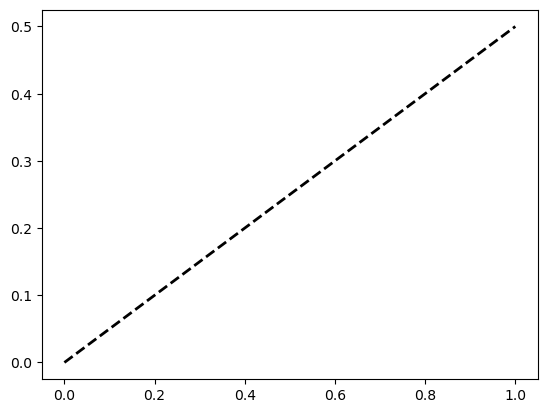

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y, color="black", linewidth=2, linestyle="--")

plt.show(fig)

In addition, we can modify the axes using additional axes methods:

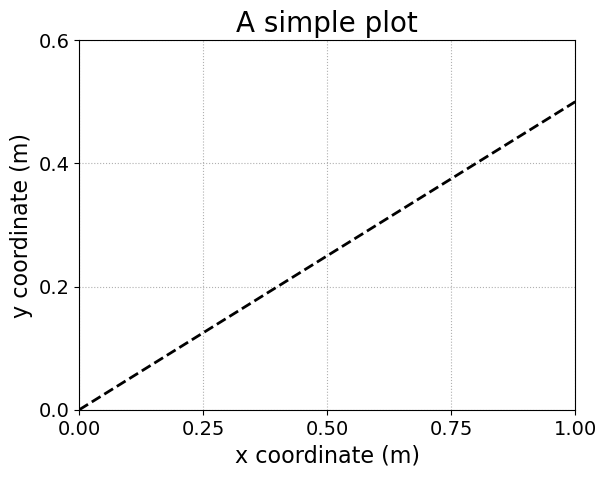

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

# the main data series
ax.plot(x, y, color="black", linewidth=2, linestyle="--")

# set the plot title
ax.set_title("A simple plot", fontsize=20)

# set the x limit and y limit
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.6)

# set the axes labels, with custom font-size
ax.set_xlabel("x coordinate (m)", fontsize=16)
ax.set_ylabel("y coordinate (m)", fontsize=16)

# set the location of ticks
ax.set_xticks(np.arange(0, 1.01, 0.25))
ax.set_yticks(np.arange(0, 0.61, 0.2))

# set the fontsize of ticks
ax.tick_params(labelsize=14)

# add a grid of dotted lines
ax.grid(linestyle=":")

plt.show(fig)

If you have more than one data series, you just need to issue multiple `.plot()` call, one for each series. Example:

In [8]:
# set up two sets of data
x = np.linspace(0, 1, 51)
y1 = 0.5 * x
y2 = 0.5 * np.sqrt(x)

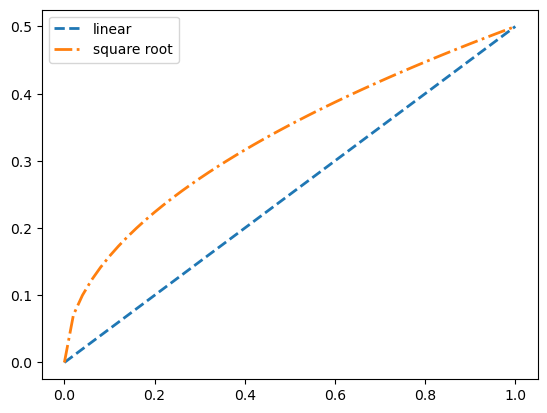

In [13]:
# plotting both data series
fig = plt.figure()
ax = fig.add_subplot()

# the main data series
# Note the use of `label` to name each data series
ax.plot(x, y1, color="tab:blue", linewidth=2, linestyle="--", label="linear")
ax.plot(x, y2, color="tab:orange", linewidth=2, linestyle="-.", label="square root")

# create legend
ax.legend()

plt.show(fig)

## Exporting figures

Sometimes you'll want to export your figure as an image file, so that, e.g., you can include it in your PowerPoint presentation. To save a figure into file, include a `fig.savefig()` call just before the `plt.show()` call. For example, to export the above figure,

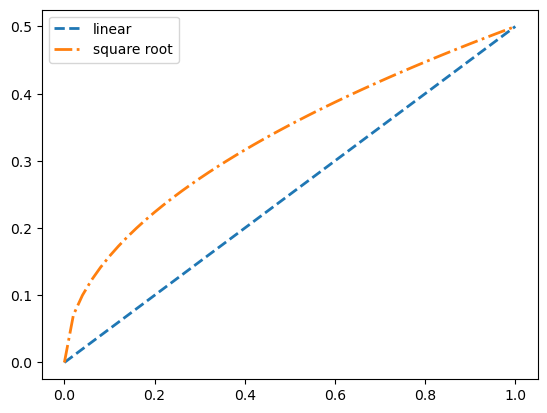

In [7]:
x = np.linspace(0, 1, 51)
y1 = 0.5 * x
y2 = 0.5 * np.sqrt(x)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y1, color="tab:blue", linewidth=2, linestyle="--", label="linear")
ax.plot(x, y2, color="tab:orange", linewidth=2, linestyle="-.", label="square root")

ax.legend()

# NOTE: the output folder needs to already exists
fig.savefig("output/linear_vs_sq_root.png")

plt.show(fig)

An optional argument you may want to supply is `dpi`, which determines how many pixels correspond to one inch. Since the figure's dimension is determined in units of inch internally, this will in effect adjust how big your file is in terms of pixels. For example,

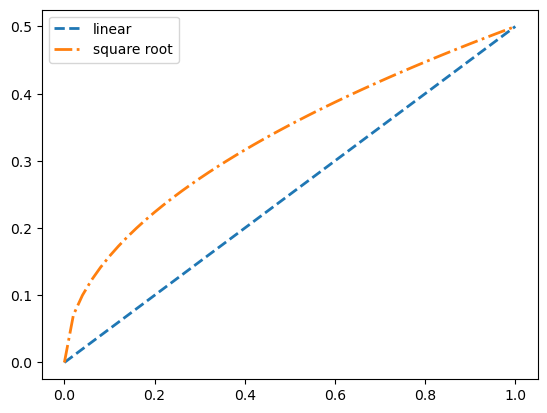

In [8]:
x = np.linspace(0, 1, 51)
y1 = 0.5 * x
y2 = 0.5 * np.sqrt(x)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y1, color="tab:blue", linewidth=2, linestyle="--", label="linear")
ax.plot(x, y2, color="tab:orange", linewidth=2, linestyle="-.", label="square root")

ax.legend()

# NOTE the use of `dpi` and the slight change in file name
fig.savefig("output/linear_vs_sq_root_BIG.png", dpi=600)

plt.show(fig)

Matplotlib can export to a variety of file format. For **raster** (pixelated) formats we recoomend `.png`. For **vector** (geometric shape based) formats we recommand `.pdf` or `.svg`. Note that matplotlib can infer the output format from the output file name.

Occasionally, when the x-axis label or tick labels are too long, some parts of the labels will be cropped. To prevent this from happening, use the `bbox_inches="tight"` argument in the `fig.savefig()` call.

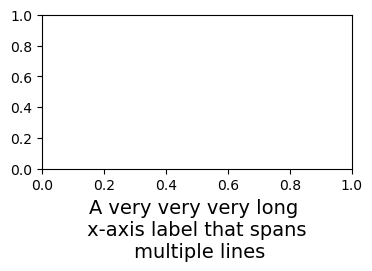

In [10]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()

# x-axis label with explicit linebreaks (`\n`)
ax.set_xlabel("A very very very long \n x-axis label that spans \n multiple lines", fontsize=14)

fig.savefig("output/long_x_label_cropped.png") # cropped x label

fig.savefig("output/long_x_label.png", bbox_inches="tight") # x label not cropped

plt.show(fig)